In [2]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint

In [12]:
# Import the csvs into DataFrames
dairy = pd.read_csv("Resources/dymfg.csv")
meat = pd.read_csv("Resources/mtpcc.csv")
fats = pd.read_csv("Resources/fats.csv")
fruit = pd.read_csv("Resources/frtot.csv")
veggie = pd.read_csv("Resources/vegtot.csv")
grain = pd.read_csv("Resources/grains.csv")
sugar = pd.read_csv("Resources/sugar.csv")
dairy.head()

,Year,Variable,Unit,Commodity,Primary weight,Loss from primary to retail weight,Retail weight,Loss from retail/institutional to consumer level,Consumer weight,Nonedible share,...,Other (cooking loss and uneaten food),"Total loss, all levels",Per capita availability (lbs/year),Per capita availability (gals/year),Per capita availability (oz/day),Per capita availability (g/day),Calories per cup-equivalent,Grams per cup-equivalent,Calories available daily,Food pattern equivalents available daily
0,1970,Dairy,Pounds,Plain whole milk,213.541258,0.0,213.541258,12.0,187.916307,0.0,...,20.0,29.6,150.333046,17.480587,6.589942,186.821553,149.0,244.0,114.083653,0.765662
1,1971,Dairy,Pounds,Plain whole milk,208.671982,0.0,208.671982,12.0,183.631344,0.0,...,20.0,29.6,146.905075,17.081985,6.439675,182.561553,149.0,244.0,111.482260,0.748203
2,1972,Dairy,Pounds,Plain whole milk,200.411880,0.0,200.411880,12.0,176.362455,0.0,...,20.0,29.6,141.089964,16.405810,6.184766,175.335011,149.0,244.0,107.069330,0.718586
3,1973,Dairy,Pounds,Plain whole milk,190.384042,0.0,190.384042,12.0,167.537957,0.0,...,20.0,29.6,134.030366,15.584926,5.875304,166.561922,149.0,244.0,101.711994,0.682631
4,1974,Dairy,Pounds,Plain whole milk,180.025499,0.0,180.025499,12.0,158.422439,0.0,...,20.0,29.6,126.737951,14.736971,5.555636,157.499509,149.0,244.0,96.177979,0.645490


In [13]:
#Group by Year, combine into singular DataFrame
#Dairy
Dairy = dairy.groupby('Year').sum().reset_index()
Dairy['Dairy'] = round(Dairy['Calories available daily '],2)
total = Dairy[['Year', 'Dairy']]

#Meat
Meat = meat.groupby('Year').sum().reset_index()
total['Meat'] = round(Meat['Calories available daily '],2)

#Fats
Fats = fats.groupby('Year').sum().reset_index()
total['Fats'] = round(Fats['Calories available daily '],2)

#Fruits
Fruit = fruit.groupby('Year').sum().reset_index()
total['Fruit'] = round(Fruit['Calories available daily '],2)

#Vegetables
Veggie = veggie.groupby('Year').sum().reset_index()
total['Vegetable'] = round(Veggie['Calories available daily '],2)

#Grain
Grain = grain.groupby('Year').sum().reset_index()
total['Grain'] = round(Grain['Calories available daily '],2)

#Sugar
Sugar = sugar.groupby('Year').sum().reset_index()
total['Sugar'] = round(Sugar['Calories available daily '],2)

total = total.set_index('Year')
total2 = round(total.div(total.sum(axis=1), axis=0),4)
total2 = total2.reset_index()
total = total.reset_index()
total.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html

,Year,Dairy,Meat,Fats,Fruit,Vegetable,Grain,Sugar
0,1970,250.29,508.90,346.18,71.28,134.64,409.81,332.54
1,1971,250.85,516.36,341.93,73.05,132.25,403.74,335.32
2,1972,248.88,515.38,353.23,68.73,131.78,399.03,339.19
3,1973,247.48,486.20,356.92,71.76,132.00,410.80,340.26
4,1974,240.66,502.62,349.17,72.55,126.80,406.40,328.81


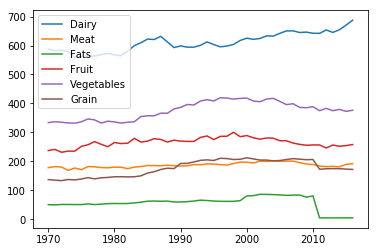

In [14]:
# Test Graph. Note that the Fats/Grain that were changed will be fixed after we meet on Tueday
legend = ['Dairy', 'Vegetables', 'Fruit', 'Meat', 'Grain','Fats', 'Sugar']
plt.stackplot(total2.Year, total2.Dairy, 
         total2.Vegetable,
         total2.Fruit,
         total2.Meat,  
         total2.Grain,
         total2.Fats,
         total2.Sugar)

xposition = [1984, 1992, 2005, 2011]
for xc in xposition:
   plt.axvline(x=xc, color='black', linestyle='--')



#plt.legend(legend)

Text(0.5, 1.0, 'Consumption Percentages of Food Types in 1983')

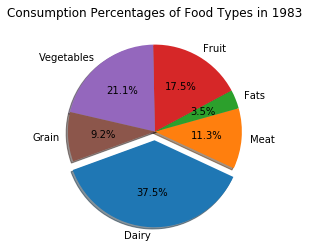

In [57]:
# Chris' Block --------------------------------------
#1983, index(13)
data_1983 = total.loc[13,:]
#print(data_1983)
data=data_1983[[1,2,3,4,5,6]]
#print(data)
#Labels
legend = ['Dairy', 'Meat', 'Fats', 'Fruit', 'Vegetables', 'Grain']
#print(legend)
explode = (.1, 0, 0, 0, 0, 0)
#pie
plt.pie(data, explode=explode, labels=legend, shadow=True, autopct="%1.1f%%", startangle=200)
plt.title("Consumption Percentages of Food Types in 1983")